## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

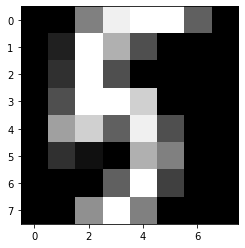

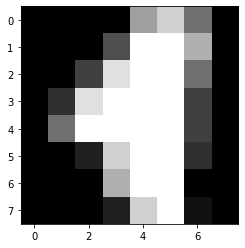

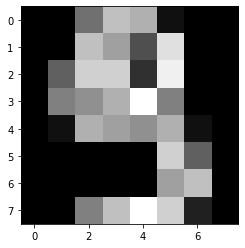

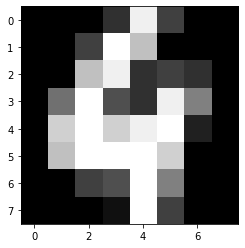

In [8]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

### Neural Net

In [10]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: total: 1.72 s
Wall time: 3.25 s


In [11]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 3.88 ms


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       0.97      1.00      0.99        36
           3       0.95      0.98      0.96        41
           4       0.95      0.97      0.96        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       0.97      0.95      0.96        37
           8       0.96      0.93      0.95        29
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## With RandomizedSearchCV

In [14]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (60, 40, 20), 'alpha': 1, 'activation': 'tanh'}
CPU times: total: 6.77 s
Wall time: 8min 55s


In [15]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.99        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        37
           8       0.97      1.00      0.98        29
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

CPU times: total: 0 ns
Wall time: 9.35 ms


## With GridSearchCV

In [16]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'activation': 'relu', 'alpha': 0.5, 'hidden_layer_sizes': (70,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.005, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 5.08 s
Wall time: 2min 9s


In [17]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.93      0.96        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

CPU times: total: 15.6 ms
Wall time: 10.2 ms


## Model the data

In [23]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 

In [47]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

## Decision Tree Classifer

In [48]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train, y_train)

In [49]:
c_matrix = confusion_matrix(y_test, dt.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

## Randomized Search Decision Tree

In [28]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,50),  
    'min_samples_leaf': np.arange(1,50),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 200), 
    'max_depth': np.arange(1,60), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best accuracy score is 0.8420489740611691
... with parameters: {'min_samples_split': 6, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0076, 'max_leaf_nodes': 74, 'max_depth': 25, 'criterion': 'entropy'}


C:\Users\akhil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\akhil\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (

In [29]:
c_matrix = confusion_matrix(y_test,rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decisio Tree random", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])


In [30]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.91      0.89      0.90        35
           2       0.89      0.92      0.90        36
           3       0.83      0.85      0.84        41
           4       0.78      0.95      0.86        38
           5       0.87      0.90      0.89        30
           6       1.00      0.97      0.99        37
           7       1.00      0.81      0.90        37
           8       0.96      0.79      0.87        29
           9       0.81      0.88      0.85        34

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.90       360

CPU times: total: 0 ns
Wall time: 10.9 ms


## Grid search DecisionTree

In [39]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(5,9),  
    'min_samples_leaf': np.arange(1,4),
    'min_impurity_decrease': np.arange(0.003, 0.008, 0.001),
    'max_leaf_nodes': np.arange(72, 76), 
    'max_depth': np.arange(22,26), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
The best accuracy score is 0.8580574912891986
... with parameters: {'criterion': 'entropy', 'max_depth': 23, 'max_leaf_nodes': 74, 'min_impurity_decrease': 0.004, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [40]:
c_matrix = confusion_matrix(y_test,grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree grid Search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])


In [41]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.91      0.94        35
           2       0.89      0.92      0.90        36
           3       0.83      0.85      0.84        41
           4       0.92      0.95      0.94        38
           5       0.83      0.97      0.89        30
           6       1.00      0.97      0.99        37
           7       0.91      0.81      0.86        37
           8       0.96      0.79      0.87        29
           9       0.81      0.88      0.85        34

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360

CPU times: total: 0 ns
Wall time: 11 ms


#Based on the accuracy results, the neural network with an accuracy of 0.97 outperforms the Decision Tree Classifier with an accuracy of 0.89 in predicting handwritten digits in the MNIST dataset.

#After performing hyperparameter tuning using RandomizedSearchCV and GridSearchCV, the accuracy of the neural network improved to 0.99 and 0.98 respectively, which suggests that hyperparameter tuning significantly improved the performance of the model.

#On the other hand, the hyperparameter tuning for the Decision Tree Classifier slightly increased from 0.89 to 0.90

#Neural network achieved a significantly higher accuracy than the Decision Tree Classifier, and hyperparameter tuning further improved the performance of the neural network. Therefore, the neural network appears to be a better modeling approach for predicting handwritten digits in the MNIST dataset.